### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

### Defining the path of dataset directory

In [3]:
dataset_path = "/content/drive/MyDrive/PlantVillage/plant(tomato&potatao)"

### Visualizing the images and Resize images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import random
import os

*italicised text*### Convert the images into a Numpy array and normalize them

In [5]:
# Converting Images to array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
dataset_path = "/content/drive/MyDrive/PlantVillage/plant(tomato&potatao)"
labels = os.listdir(dataset_path)

print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Potato___healthy', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot']


In [8]:
import os
import numpy as np
from PIL import Image

def convert_image_to_array(image_path):
    image = Image.open(image_path)
    return np.array(image)

dataset_path = "/content/drive/MyDrive/PlantVillage/plant(tomato&potatao)"
root_dir = os.listdir(dataset_path)

all_labels = ['Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Potato___healthy', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot']
# Create a dictionary to map labels to numerical values
label_mapping = {label: index for index, label in enumerate(all_labels)}

# Initialize empty lists
image_list, label_list = [], []

# Iterate through directories and files to build the dataset
for directory in root_dir:
    plant_image_list = os.listdir(f"{dataset_path}/{directory}")
    for file in plant_image_list:
        image_path = f"{dataset_path}/{directory}/{file}"
        # Check if the entry is a file before attempting to open it
        if os.path.isfile(image_path):
            image_list.append(convert_image_to_array(image_path))
            label_list.append(label_mapping.get(directory))

# Now, image_list contains the arrays of images, and label_list contains the corresponding numerical labels


### Visualize the class count and Check for class imbalance

In [9]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
5,1919
2,952
3,944
7,631
6,332


In [8]:
# it is a balanced dataset as we can see

In [10]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [9]:
# Checking the total number of the images which is the length of the labels list.

label_list =to_categorical(np.array(label_list), num_classes=len(all_labels))
label_list.shape

(5192, 8)

### Splitting the dataset into train, validate and test sets

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [11]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Performing one-hot encoding on target variable

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming label_list contains numerical labels
num_classes = len(all_labels)  # Number of unique classes

# Convert labels to one-hot encoding
y_data = to_categorical(np.array(label_list), num_classes=num_classes)

# Check the shape of the label array
print("Shape of y_data:", y_data.shape)


Shape of y_data: (5192, 8)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(254, (3, 3), padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))
from keras.regularizers import l2
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(8, activation = "softmax"))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,736 (28.20 MB)

 Trainable params: 7,393,544 (28.20 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def convert_image_to_array(image_path):
    image = Image.open(image_path)
    image = image.resize((128, 128))  # Resize to the model input size
    image = img_to_array(image)
    image = image.astype('float32') / 255.0  # Normalize the image
    return image


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.1), metrics = ['accuracy'])

In [ ]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [ ]:


# Train the model
epochs = 100
batch_size = 30



# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Shape of the first image in x_data: (128, 128, 3)
Total number of images: 5192
Shape of label data: (5192, 8)
Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - accuracy: 0.4658 - loss: 7.0496 - val_accuracy: 0.3532 - val_loss: 49.6686
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5535 - loss: 1.3224 - val_accuracy: 0.3417 - val_loss: 37.7886
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5720 - loss: 1.3005 - val_accuracy: 0.5005 - val_loss: 5.0716
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5898 - loss: 1.1621 - val_accuracy: 0.3754 - val_loss: 12.2178
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6078 - loss: 1.0685 - val_accuracy: 0.5525 - val_loss: 1.7127
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6117 - loss: 1.1605 - val_accuracy: 0.5958 - val_loss: 1.8440
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6386 - loss: 0.9888 - val_accuracy: 0.

In [18]:
model.save("C:\Plant-Disease-Detection\Model\plant_disease_model.keras")

### Plot the accuracy and loss against each epoch

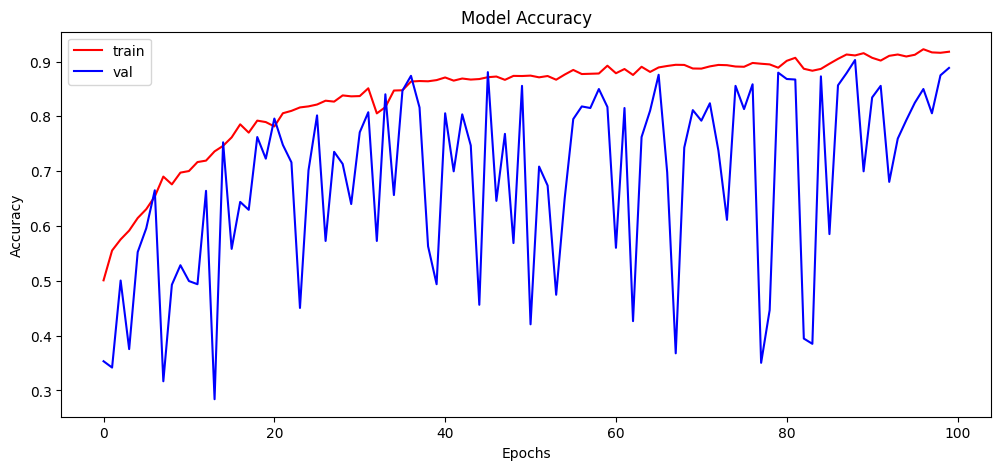

In [19]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

### Visualizing the original and predicted labels for the test images

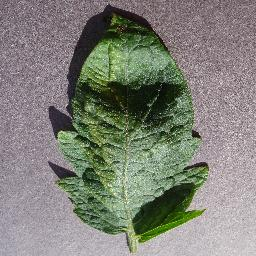

In [22]:
# Plotting image to compare

img = array_to_img(x_test[11])
img
